In [1]:
%matplotlib notebook
import os
import time
import numpy as np
import csv
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from classes.Settings import Settings

from plot_contact_atoms_3 import make_coordinate_df
from calc_density_4 import count_points_per_square

from helpers.plot_functions import plot_density, plot_fragment_colored, plot_vdw_spheres
from helpers.density_helpers import prepare_df, find_available_volume
from helpers.geometry_helpers import (make_coordinate_df,
                                      get_vdw_distance_contact)


central_groups = ["RC6F5"] #,
contact_groups = ["CF", "RCN", "R2CO", "XH", "CCH3", "C2CH2"]
to_count =       ["F",   "N",    "O",   "H",   "H",     "H"]
resolutions = np.arange(0.1, 1.6, 0.1)

In [2]:
def plot_contour_level(ax, df, settings, level):
    if level == 25:
        color = "red"
    elif level == 50:
        color = "green"
    elif level == 75:
        color = "blue"
    
    ax.scatter(list(df.xmiddle), list(df.ymiddle), list(df.zmiddle), c=color, s=2, alpha=0.5, label="level " + str(round(level, 2)))

    return ax

<IPython.core.display.Javascript object>


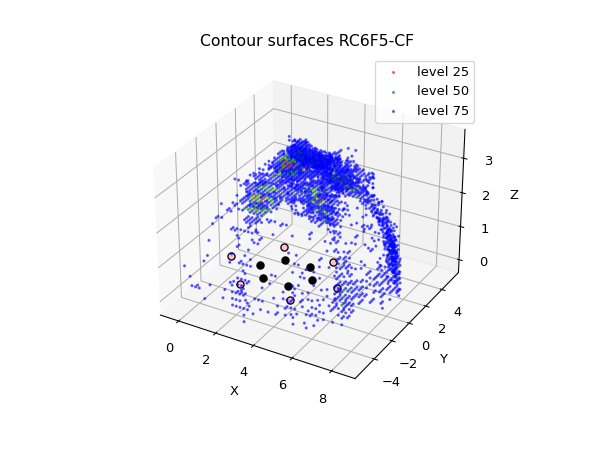

<IPython.core.display.Javascript object>


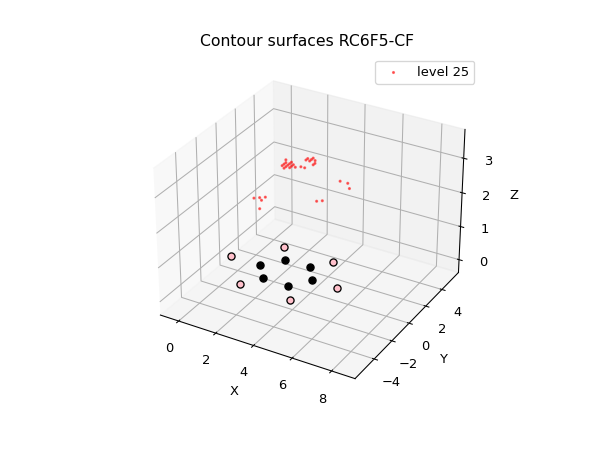

<IPython.core.display.Javascript object>


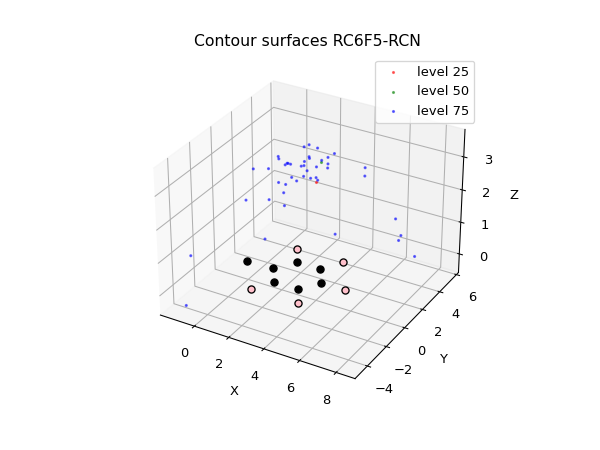

<IPython.core.display.Javascript object>


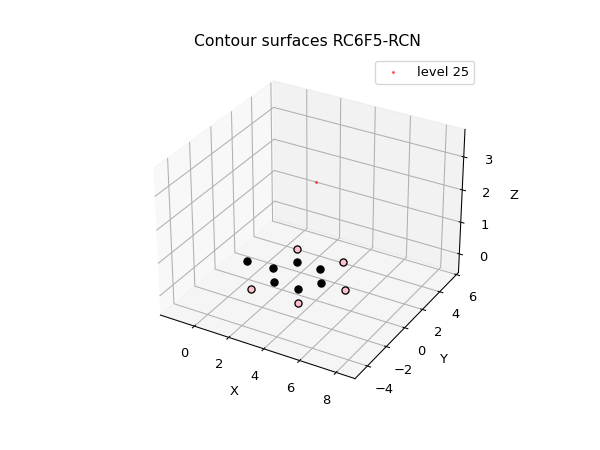

<IPython.core.display.Javascript object>


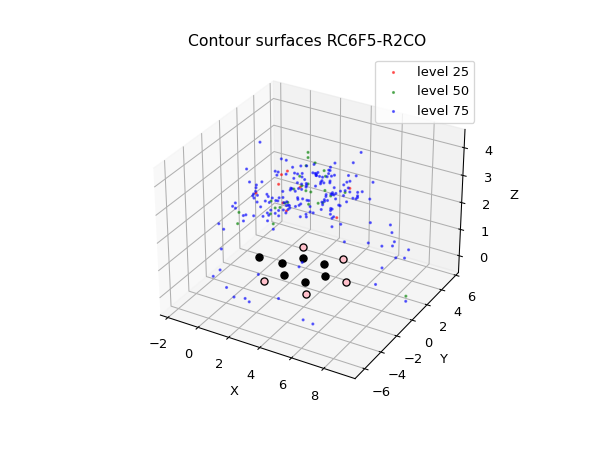

<IPython.core.display.Javascript object>


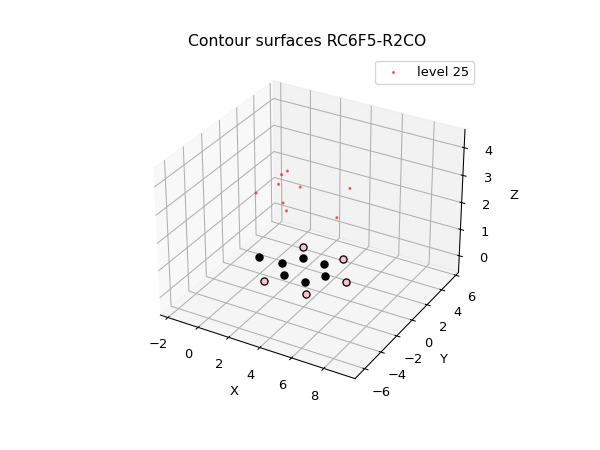

<IPython.core.display.Javascript object>


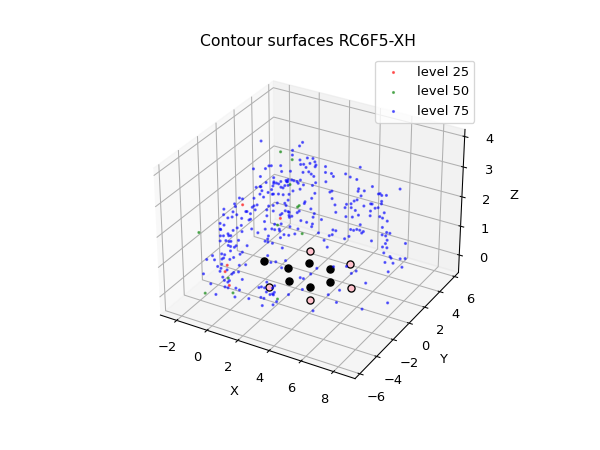

<IPython.core.display.Javascript object>


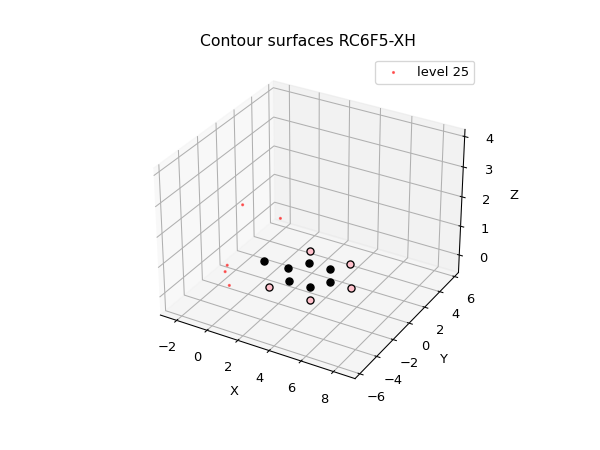

<IPython.core.display.Javascript object>


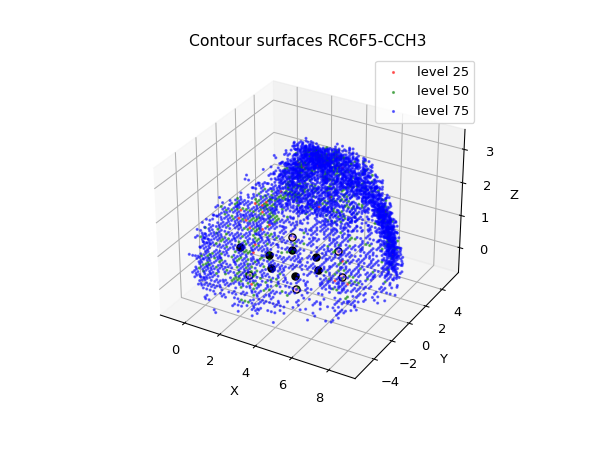

<IPython.core.display.Javascript object>


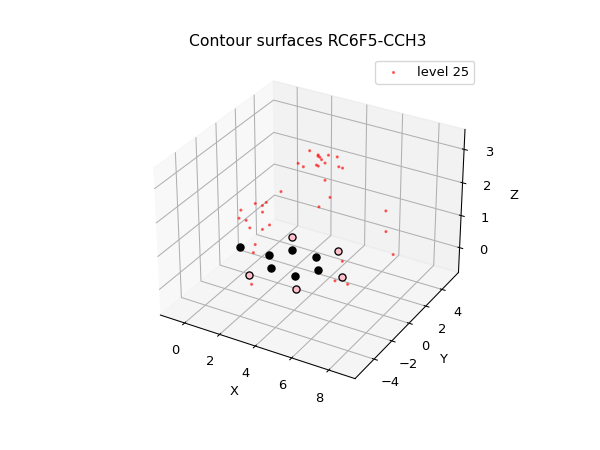

<IPython.core.display.Javascript object>


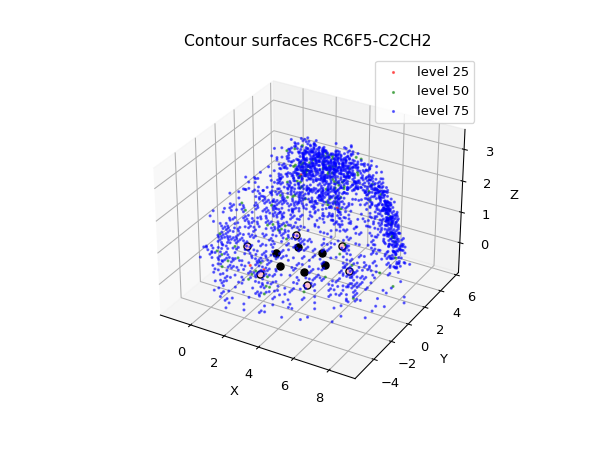

<IPython.core.display.Javascript object>


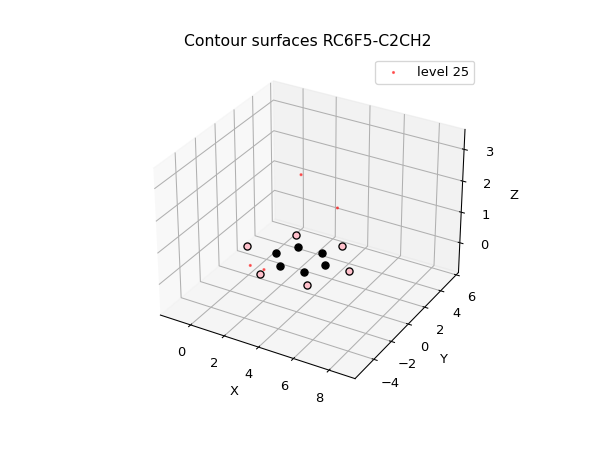

In [3]:
for central in central_groups:
    for contact, to_count_contact in zip(contact_groups, to_count):      
        filename = ".\\results\\" + central + "\\" + central + "_" + contact + "_vdw.5" + "\\" + central + "_" + contact + "_vdw.5_aligned.csv"
        settings = Settings(filename)
        settings.set_atom_to_count(to_count_contact)
        settings.set_resolution(round(0.2, 2))
        
        avg_fragment = pd.read_csv(settings.get_avg_frag_filename())
        density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())
        
        density_df = density_df.sort_values(by=[to_count_contact], ascending=False)
        
        density_df['ymiddle'] = (density_df['ystart'] * 2 + settings.resolution) / 2
        density_df['xmiddle'] = (density_df['xstart'] * 2 + settings.resolution) / 2
        density_df['zmiddle'] = (density_df['zstart'] * 2 + settings.resolution) / 2
        
        fig = plt.figure()

        ax: Axes3D = fig.add_subplot(111, projection='3d')
        ax.set_title('Contour surfaces ' + central + "-" + contact)
        
        ax = plot_fragment_colored(ax, avg_fragment)
            
        max_bin = density_df[to_count_contact].max()
        percent_25 = 0.25 * max_bin
        percent_50 = 0.50 * max_bin
        percent_75 = 0.75 * max_bin
        
        ax = plot_contour_level(ax, density_df[density_df[to_count_contact] >= percent_75], settings, 25)
        ax = plot_contour_level(ax, density_df[(density_df[to_count_contact] <= percent_75) & (density_df[to_count_contact] > percent_50)], settings, 50)
        ax = plot_contour_level(ax, density_df[(density_df[to_count_contact] <= percent_50) & (density_df[to_count_contact] > percent_25)], settings, 75)
        
        lims = [ax.get_xlim(), ax.get_ylim(), ax.get_zlim()]
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.legend()
        plt.show()
        plt.savefig('./results/directionality_tests/' + central + "/" + central + "_" + contact + "_IsoStar_resolution" + str(settings.resolution) + ".png")
        
        
        fig = plt.figure()

        ax: Axes3D = fig.add_subplot(111, projection='3d')
        ax.set_title('Contour surfaces ' + central + "-" + contact)
        
        ax = plot_fragment_colored(ax, avg_fragment)
            
        max_bin = density_df[to_count_contact].max()
        percent_25 = 0.25 * max_bin
        percent_50 = 0.50 * max_bin
        percent_75 = 0.75 * max_bin
        
        ax = plot_contour_level(ax, density_df[density_df[to_count_contact] > percent_75], settings, 25)
        
        ax.set_xlim(lims[0])
        ax.set_ylim(lims[1])
        ax.set_zlim(lims[2])
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.legend()
        plt.show()
        plt.savefig('./results/directionality_tests/' + central + "/" + central + "_" + contact + "_IsoStar_resolution" + str(settings.resolution) + "level_25.png")

<IPython.core.display.Javascript object>


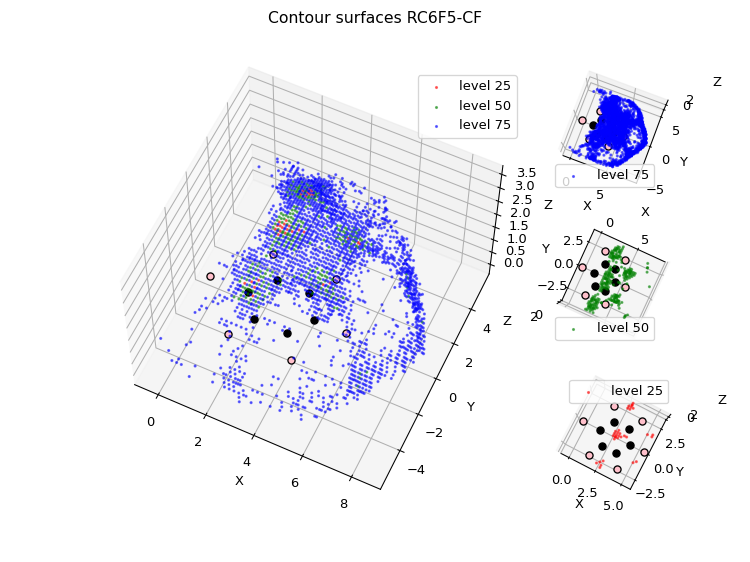

<IPython.core.display.Javascript object>


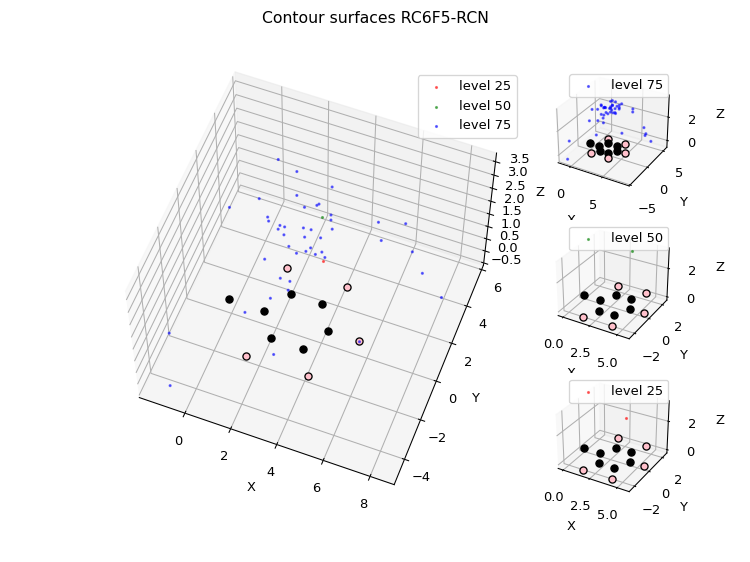

<IPython.core.display.Javascript object>


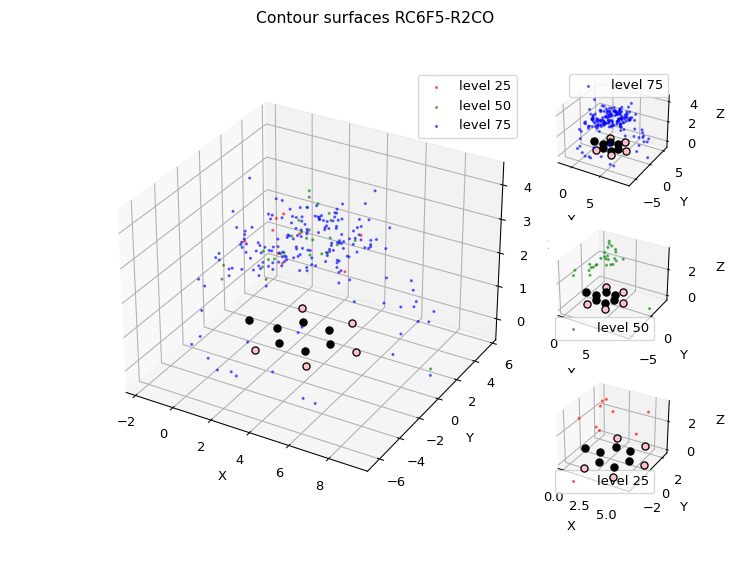

<IPython.core.display.Javascript object>


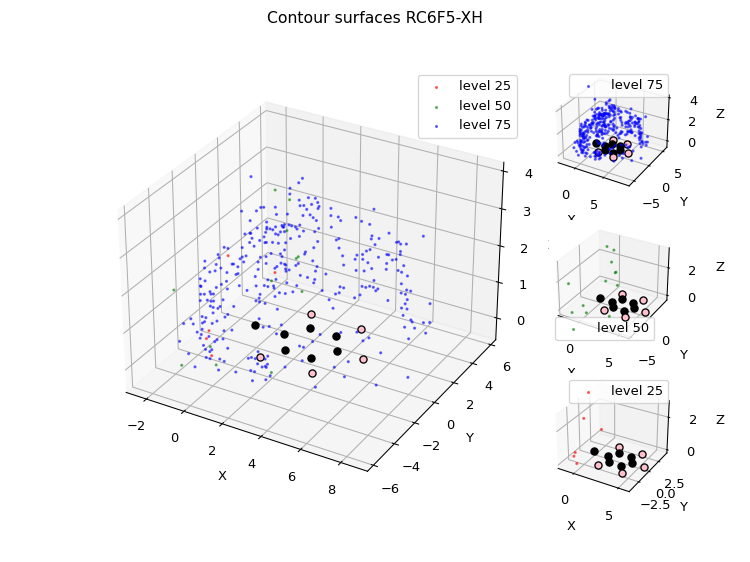

<IPython.core.display.Javascript object>


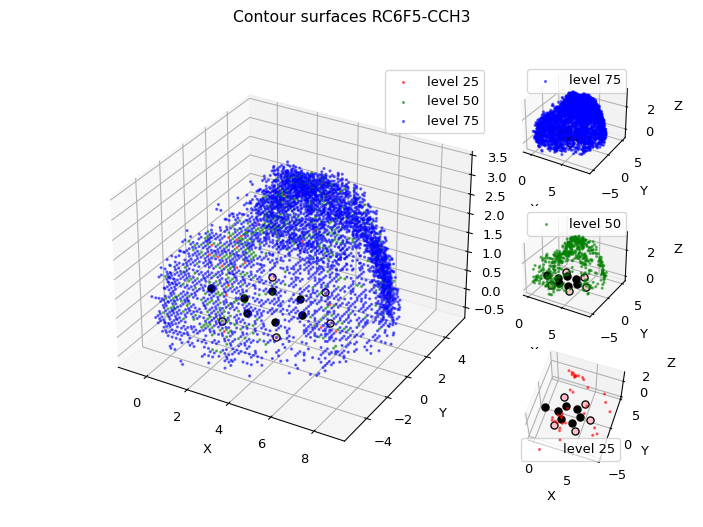

<IPython.core.display.Javascript object>


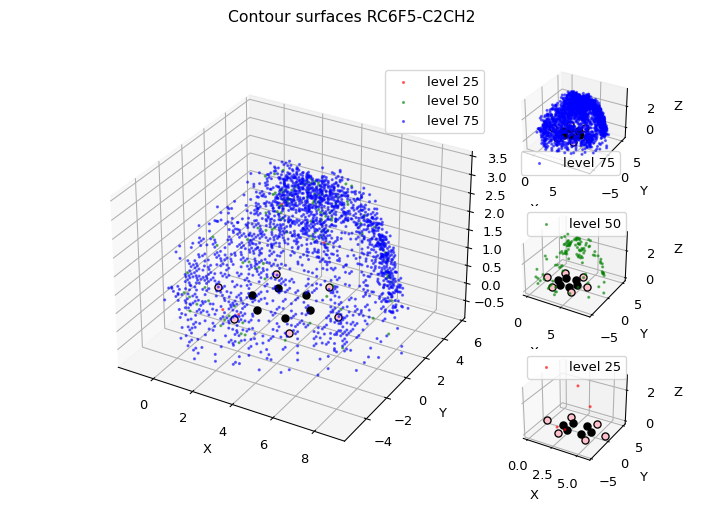

In [4]:
for central in central_groups:
    for contact, to_count_contact in zip(contact_groups, to_count):      
        filename = ".\\results\\" + central + "\\" + central + "_" + contact + "_vdw.5" + "\\" + central + "_" + contact + "_vdw.5_aligned.csv"
        settings = Settings(filename)
        settings.set_atom_to_count(to_count_contact)
        settings.set_resolution(round(0.2, 2))
        
        avg_fragment = pd.read_csv(settings.get_avg_frag_filename())
        density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())
        
        density_df = density_df.sort_values(by=[to_count_contact], ascending=False)
        
        density_df['ymiddle'] = (density_df['ystart'] * 2 + settings.resolution) / 2
        density_df['xmiddle'] = (density_df['xstart'] * 2 + settings.resolution) / 2
        density_df['zmiddle'] = (density_df['zstart'] * 2 + settings.resolution) / 2
        
        fig = plt.figure(figsize=(8, 6))
        fig.suptitle('Contour surfaces ' + central + "-" + contact)

        ax1: Axes3D = plt.subplot2grid((3, 4), (0, 0), rowspan=3, colspan=3, projection='3d')
        ax2: Axes3D = plt.subplot2grid((3, 4), (0, 3), projection='3d')
        ax3: Axes3D = plt.subplot2grid((3, 4), (1, 3), projection='3d')
        ax4: Axes3D = plt.subplot2grid((3, 4), (2, 3), projection='3d')
        
        axis = [ax1, ax2, ax3, ax4]
        
        for ax in axis:
            ax = plot_fragment_colored(ax, avg_fragment)
            
        max_bin = density_df[to_count_contact].max()
        percent_25 = 0.25 * max_bin
        percent_50 = 0.50 * max_bin
        percent_75 = 0.75 * max_bin
        
        ax1 = plot_contour_level(ax1, density_df[density_df[to_count_contact] > percent_75], settings, 25)
        ax1 = plot_contour_level(ax1, density_df[(density_df[to_count_contact] <= percent_75) & (density_df[to_count_contact] > percent_50)], settings, 50)
        ax1 = plot_contour_level(ax1, density_df[(density_df[to_count_contact] <= percent_50) & (density_df[to_count_contact] > percent_25)], settings, 75)
        
        ax4 = plot_contour_level(ax4, density_df[density_df[to_count_contact] > percent_75], settings, 25)
        ax3 = plot_contour_level(ax3, density_df[(density_df[to_count_contact] <= percent_75) & (density_df[to_count_contact] > percent_50)], settings, 50)
        ax2 = plot_contour_level(ax2, density_df[(density_df[to_count_contact] <= percent_50) & (density_df[to_count_contact] > percent_25)], settings, 75)
        
        for ax in axis:
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
        
            ax.legend()
            
        plt.show()
#         plt.savefig('./results/directionality_tests/' + central + "/" + central + "_" + contact + "_IsoStar_resolution" + str(settings.resolution) + ".png")

<IPython.core.display.Javascript object>


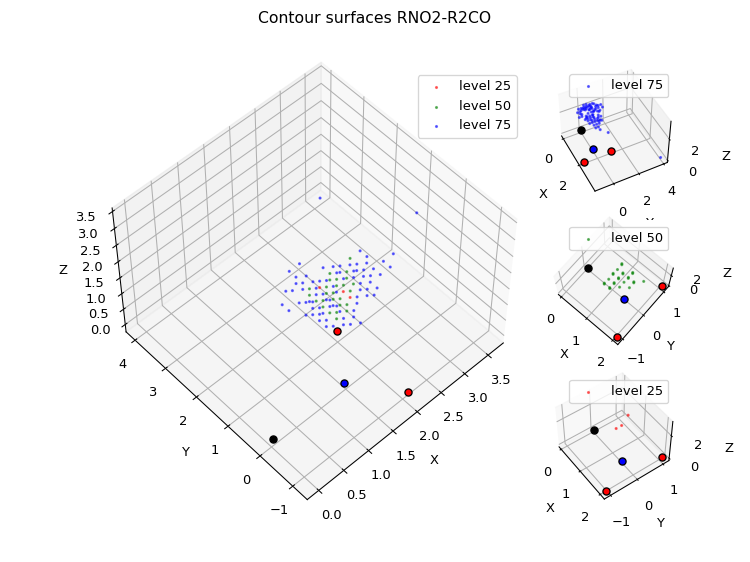

In [6]:
def make_contour_plot(central, contact, to_count_contact):
    filename = ".\\results\\" + central + "\\" + central + "_" + contact + "_vdw.5" + "\\" + central + "_" + contact + "_vdw.5_aligned.csv"
    settings = Settings(filename)
    settings.set_atom_to_count(to_count_contact)
    settings.set_resolution(round(0.2, 2))

    avg_fragment = pd.read_csv(settings.get_avg_frag_filename())
    density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())

    density_df = density_df.sort_values(by=[to_count_contact], ascending=False)

    density_df['ymiddle'] = (density_df['ystart'] * 2 + settings.resolution) / 2
    density_df['xmiddle'] = (density_df['xstart'] * 2 + settings.resolution) / 2
    density_df['zmiddle'] = (density_df['zstart'] * 2 + settings.resolution) / 2

    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Contour surfaces ' + central + "-" + contact)

    ax1: Axes3D = plt.subplot2grid((3, 4), (0, 0), rowspan=3, colspan=3, projection='3d')
    ax2: Axes3D = plt.subplot2grid((3, 4), (0, 3), projection='3d')
    ax3: Axes3D = plt.subplot2grid((3, 4), (1, 3), projection='3d')
    ax4: Axes3D = plt.subplot2grid((3, 4), (2, 3), projection='3d')

    axis = [ax1, ax2, ax3, ax4]

    for ax in axis:
        ax = plot_fragment_colored(ax, avg_fragment)

    max_bin = density_df[to_count_contact].max()
    percent_25 = 0.25 * max_bin
    percent_50 = 0.50 * max_bin
    percent_75 = 0.75 * max_bin

    ax1 = plot_contour_level(ax1, density_df[density_df[to_count_contact] > percent_75], settings, 25)
    ax1 = plot_contour_level(ax1, density_df[(density_df[to_count_contact] <= percent_75) & (density_df[to_count_contact] > percent_50)], settings, 50)
    ax1 = plot_contour_level(ax1, density_df[(density_df[to_count_contact] <= percent_50) & (density_df[to_count_contact] > percent_25)], settings, 75)

    ax4 = plot_contour_level(ax4, density_df[density_df[to_count_contact] > percent_75], settings, 25)
    ax3 = plot_contour_level(ax3, density_df[(density_df[to_count_contact] <= percent_75) & (density_df[to_count_contact] > percent_50)], settings, 50)
    ax2 = plot_contour_level(ax2, density_df[(density_df[to_count_contact] <= percent_50) & (density_df[to_count_contact] > percent_25)], settings, 75)

    for ax in axis:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        ax.legend()

    plt.show()
    

central = "RNO2"
contact = "R2CO"
to_count_contact = "O"

make_contour_plot(central, contact, to_count_contact)

<IPython.core.display.Javascript object>


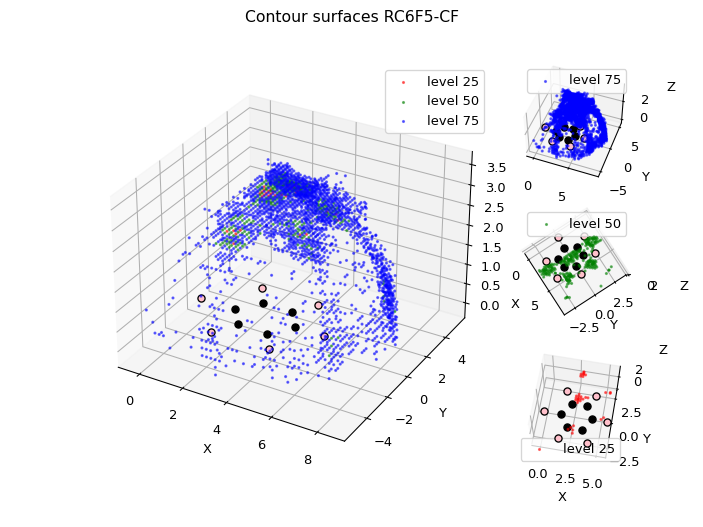

In [7]:
central = "RC6F5"
contact = "CF"
to_count_contact = "F"

make_contour_plot(central, contact, to_count_contact)